# Effect incidence angle on refractive layer transmission
In notebook 0 we showed that the output of a multilayer optical calculation performed with Windt's (IDL) IMD software and Byrnes' (python) TMM package gave the same result. We also converted Windt's method for introducing an instrument spectral resolution into python script. In this notebook we show the explicit effect of reducing the spectral resolution of the simulation output.

In [12]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

deg = np.pi/180. # conversion factor degrees to radians

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [10]:
# initialize wavelength scale and refractive indeces
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}
n_ZnS,n_Si,n_SiAs = [{} for i in range(3)]
for band in wav.keys():
    n_ZnS[band]  = funcs.indexOfRefractionZnS(wav[band])
    n_Si[band]   = funcs.indexOfRefractionSi(wav[band])
    n_SiAs[band] = funcs.indexOfRefractionSiAs(wav[band])

### Test case: ZnS layer on Si substrate on Si:As layer

<IPython.core.display.Javascript object>


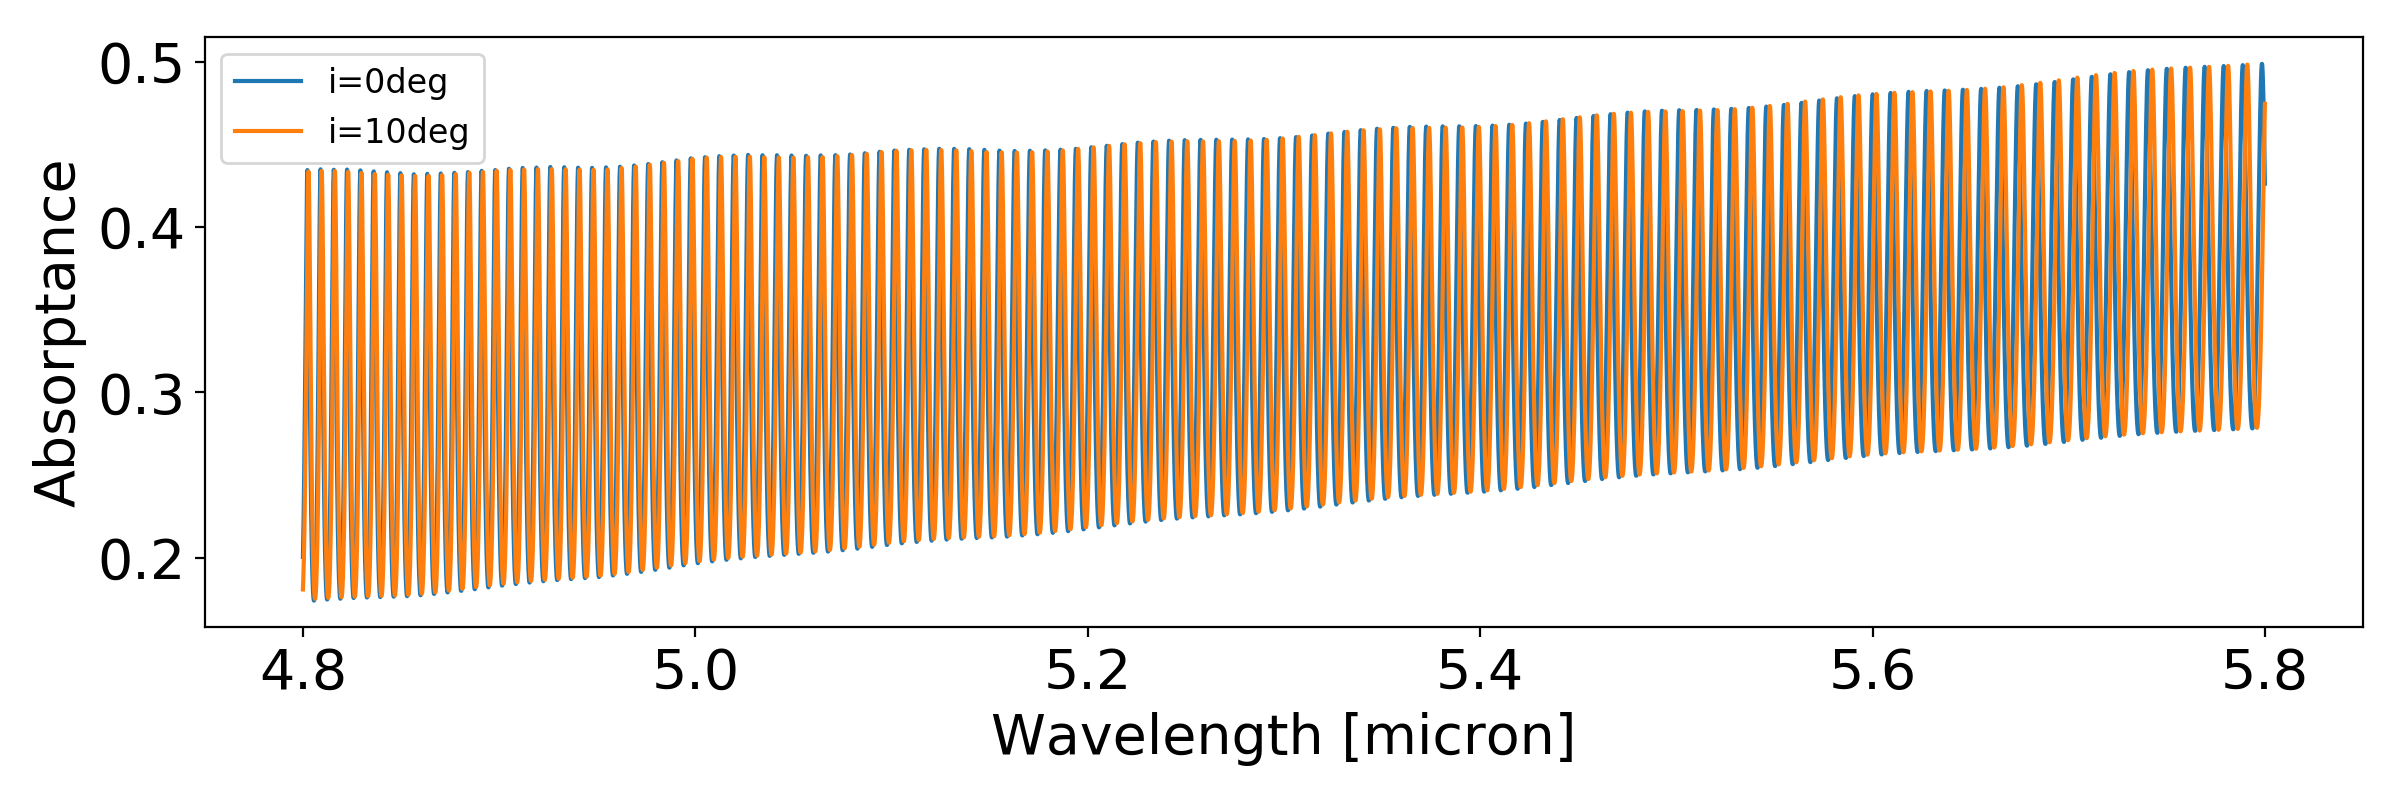

In [11]:
band = '1A'
Refl_inc0,Transm_inc0,Absorp_inc0 = [np.zeros(len(wav[band])) for i in range(3)]
Refl_inc10,Transm_inc10,Absorp_inc10 = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_inc0[i],Transm_inc0[i],Absorp_inc0[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)
    Refl_inc10[i],Transm_inc10[i],Absorp_inc10[i] =  funcs.simple_tmm(n_list, d_list, 10*deg, lambda_vac)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0,label='i=0deg')
plt.plot(wav[band],Absorp_inc10,label='i=10deg')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

### Remarks:
* Qualitatively (and quantitatively), a change in incidence angle changes the frequency of the fringes. This is because the photons have to travel longer through the optical layers before interfering at the layer interfaces.

Does a change in incidence angle change the fringe amplitude? If the photons have to travel a longer distance in an active layer it is more likely that they will get absorbed. Let's try to compute this.

### Test case: single Si:As layer

<IPython.core.display.Javascript object>


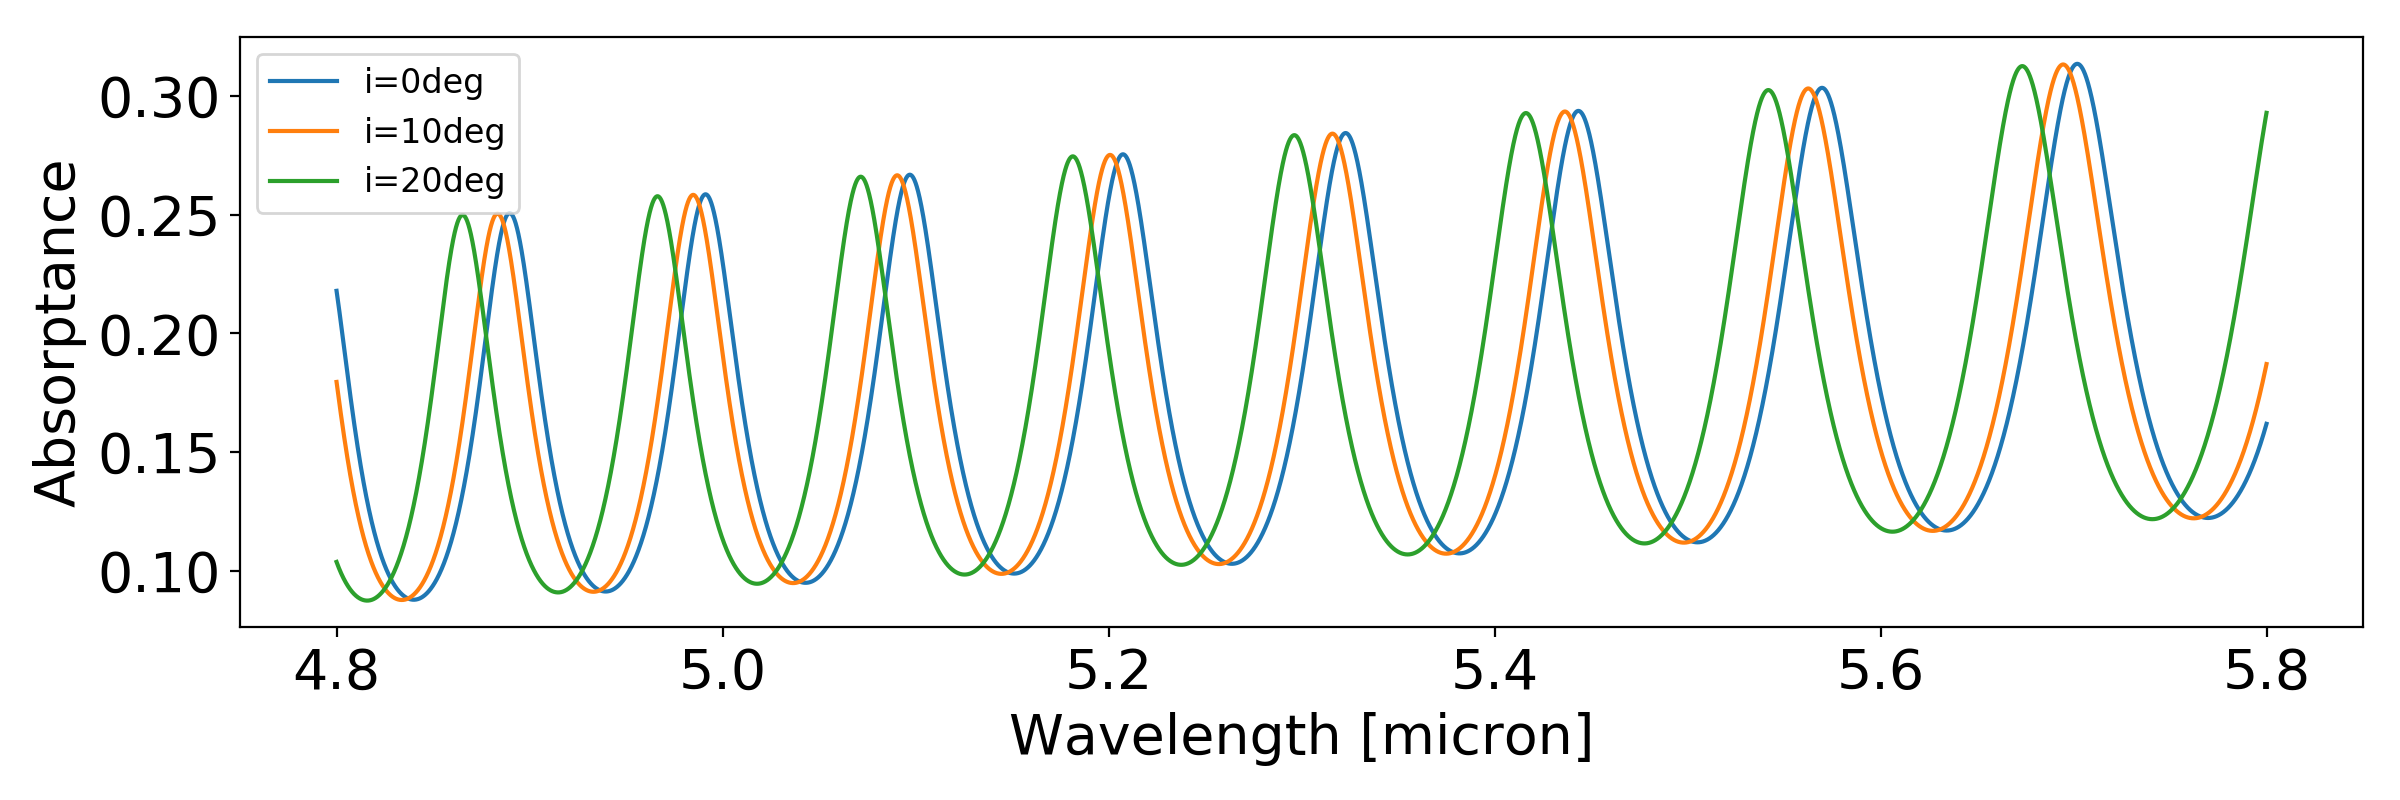

In [5]:
band = '1A'
Refl_inc0,Transm_inc0,Absorp_inc0 = [np.zeros(len(wav[band])) for i in range(3)]
Refl_inc10,Transm_inc10,Absorp_inc10 = [np.zeros(len(wav[band])) for i in range(3)]
Refl_inc20,Transm_inc20,Absorp_inc20 = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_inc0[i],Transm_inc0[i],Absorp_inc0[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)
    Refl_inc10[i],Transm_inc10[i],Absorp_inc10[i] =  funcs.simple_tmm(n_list, d_list, 10*deg, lambda_vac)
    Refl_inc20[i],Transm_inc20[i],Absorp_inc20[i] =  funcs.simple_tmm(n_list, d_list, 20*deg, lambda_vac)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0,label='i=0deg')
plt.plot(wav[band],Absorp_inc10,label='i=10deg')
plt.plot(wav[band],Absorp_inc20,label='i=20deg')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


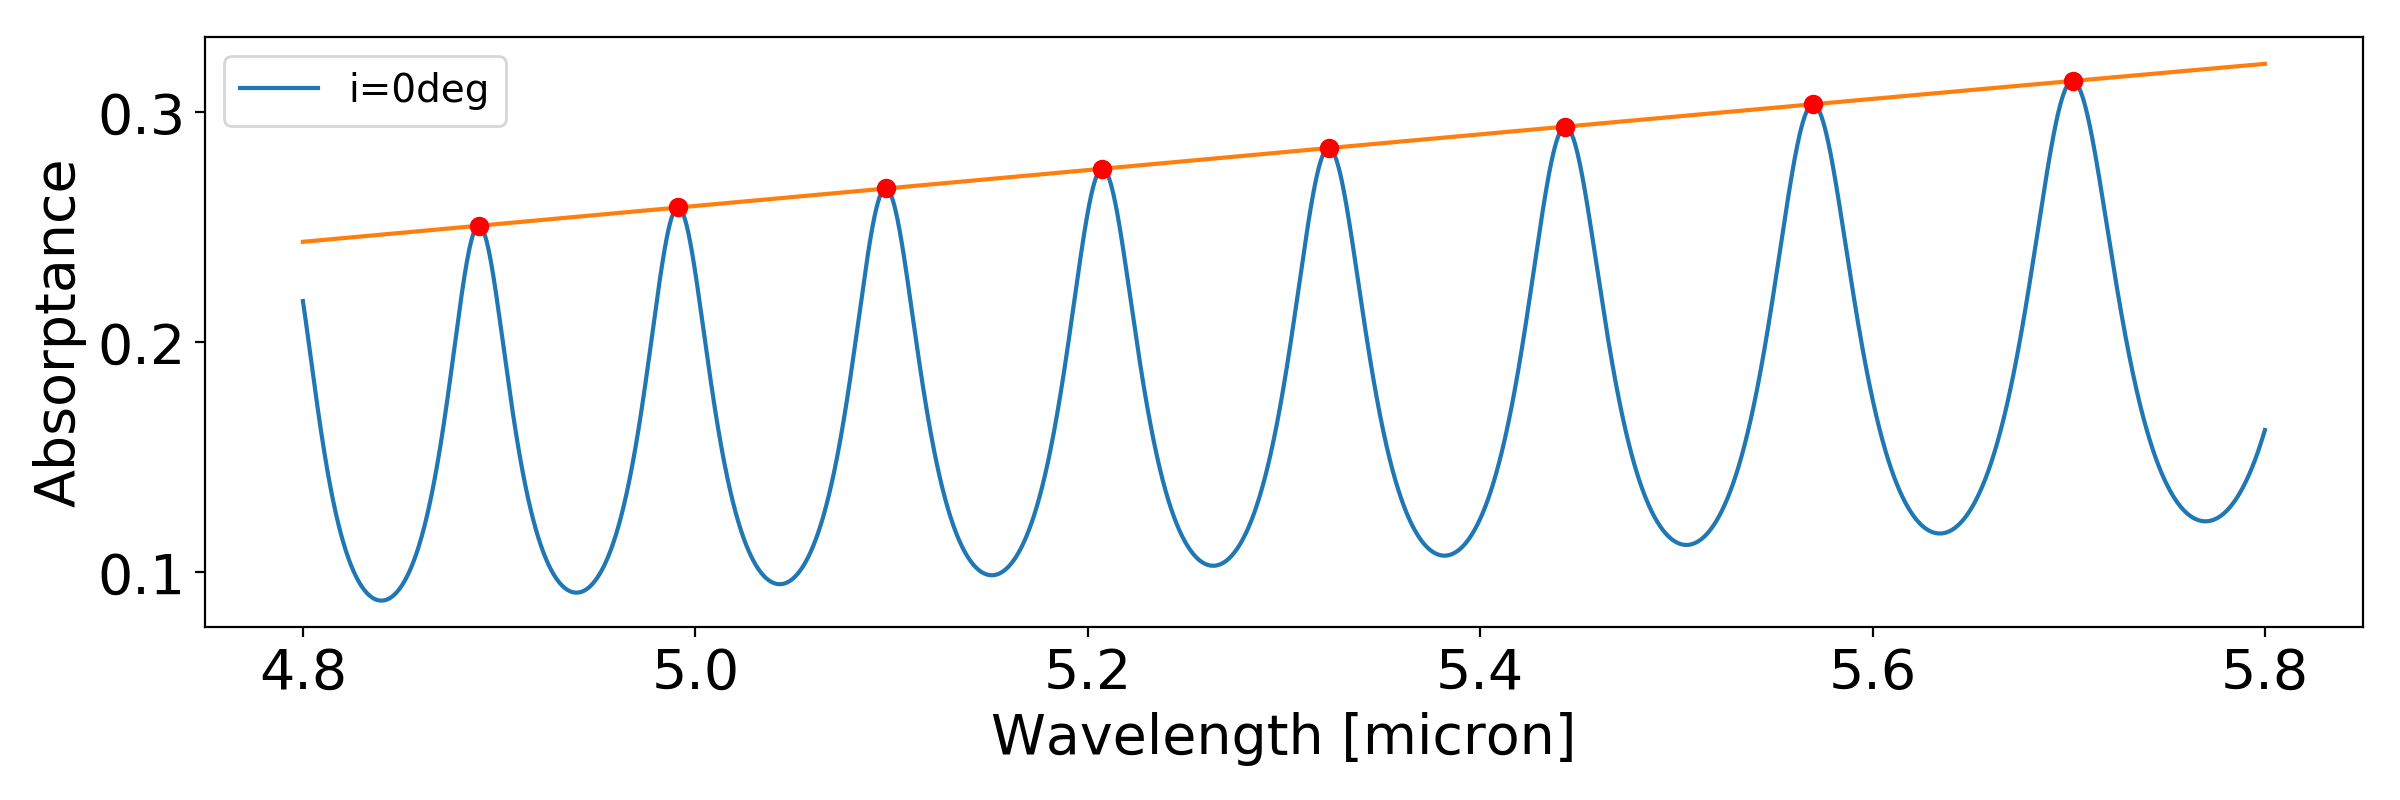

<IPython.core.display.Javascript object>


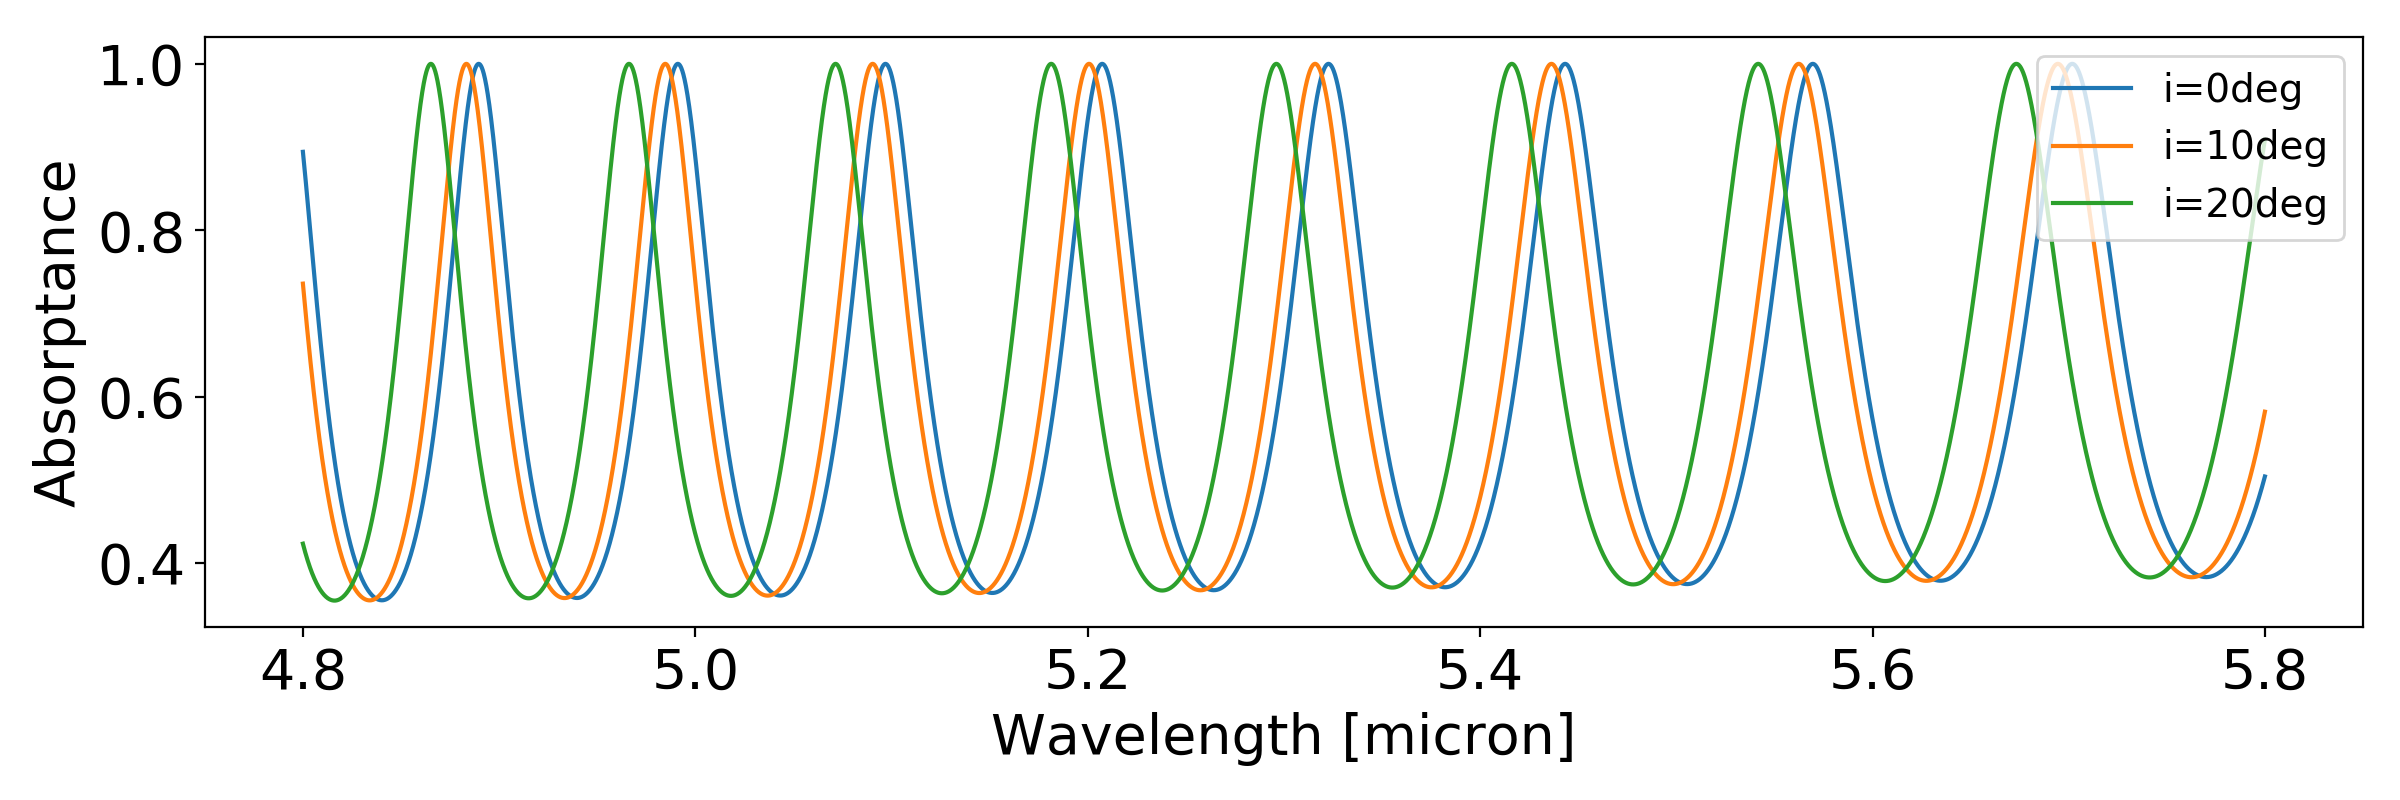

In [6]:
Absorp_inc0_norm = funcs.norm_fringe(Absorp_inc0,thres=0,min_dist=100,k=3,ext=0)
Absorp_inc10_norm = funcs.norm_fringe(Absorp_inc10,thres=0,min_dist=100,k=3,ext=0)
Absorp_inc20_norm = funcs.norm_fringe(Absorp_inc20,thres=0,min_dist=100,k=3,ext=0)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0],label='i=0deg')
plt.plot(wav[band],Absorp_inc0_norm[2])
plt.plot(wav[band][Absorp_inc0_norm[1]],Absorp_inc0_norm[0][Absorp_inc0_norm[1]],'ro')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0]/Absorp_inc0_norm[2],label='i=0deg')
plt.plot(wav[band],Absorp_inc10_norm[0]/Absorp_inc10_norm[2],label='i=10deg')
plt.plot(wav[band],Absorp_inc20_norm[0]/Absorp_inc20_norm[2],label='i=20deg')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper right')
plt.tight_layout()

### Remarks:
* It appears that changing the angle of incidence does not affect the fringe amplitude, but it does affect the "frequency", which in this case translates to which wavelength is most or least absorbed.

Is that also the case when we stack all the SW MIRI detector layers together?

### Test case: ZnS layer on Si substrate on Si:As layer

<IPython.core.display.Javascript object>


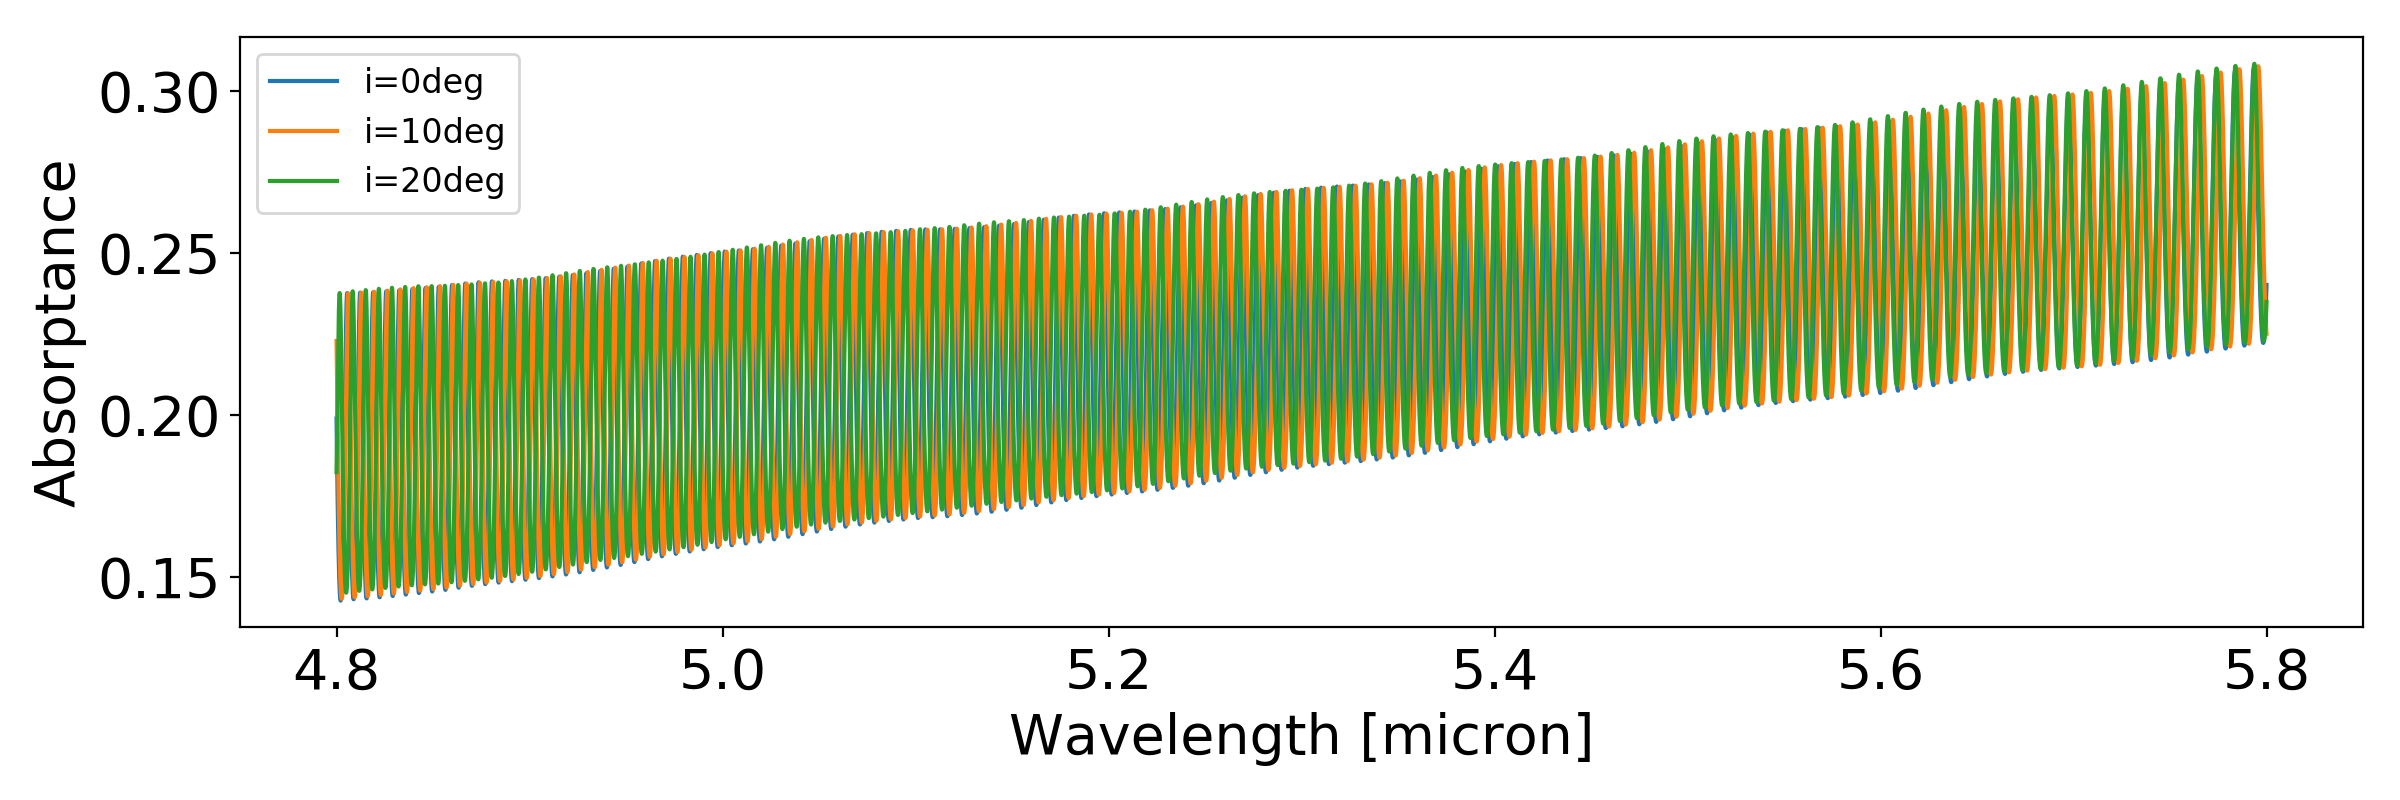

In [7]:
band = '1A'
Refl_inc0,Transm_inc0,Absorp_inc0 = [np.zeros(len(wav[band])) for i in range(3)]
Refl_inc10,Transm_inc10,Absorp_inc10 = [np.zeros(len(wav[band])) for i in range(3)]
Refl_inc20,Transm_inc20,Absorp_inc20 = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_inc0[i],Transm_inc0[i],Absorp_inc0[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)
    Refl_inc10[i],Transm_inc10[i],Absorp_inc10[i] =  funcs.simple_tmm(n_list, d_list, 10*deg, lambda_vac)
    Refl_inc20[i],Transm_inc20[i],Absorp_inc20[i] =  funcs.simple_tmm(n_list, d_list, 20*deg, lambda_vac)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0,label='i=0deg')
plt.plot(wav[band],Absorp_inc10,label='i=10deg')
plt.plot(wav[band],Absorp_inc20,label='i=20deg')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


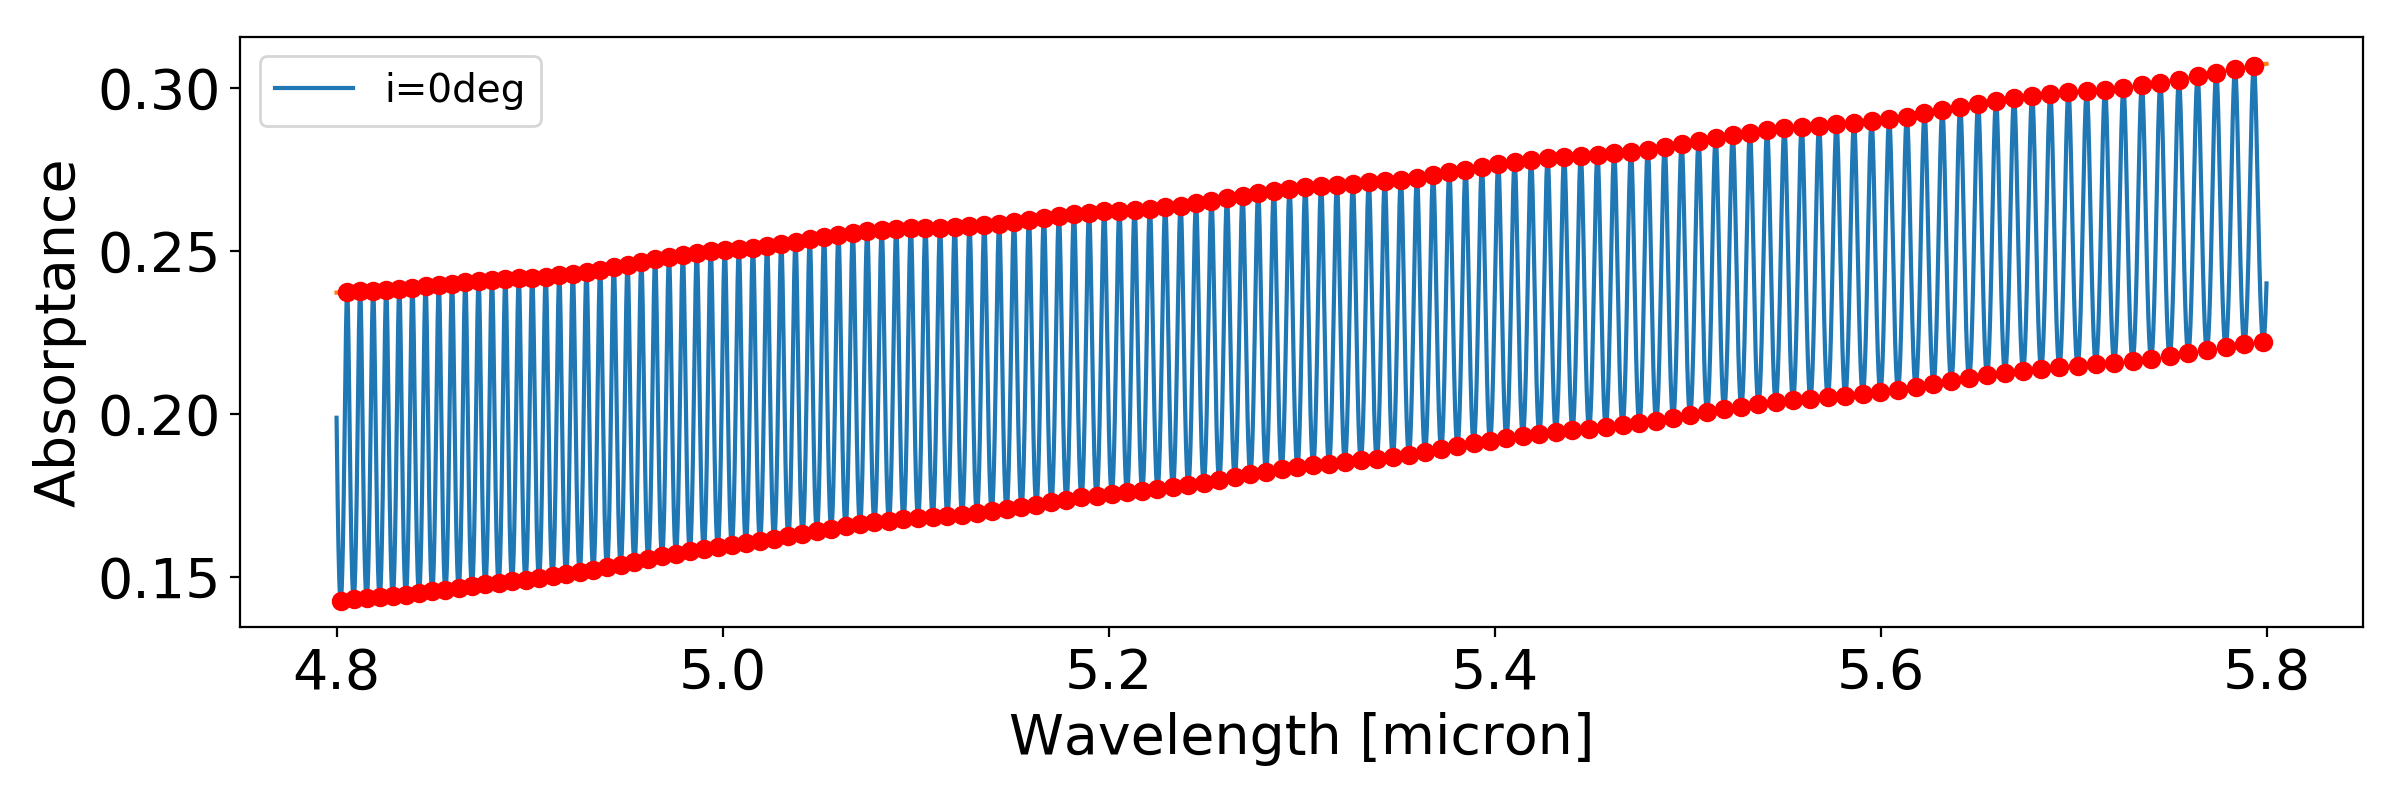

<IPython.core.display.Javascript object>


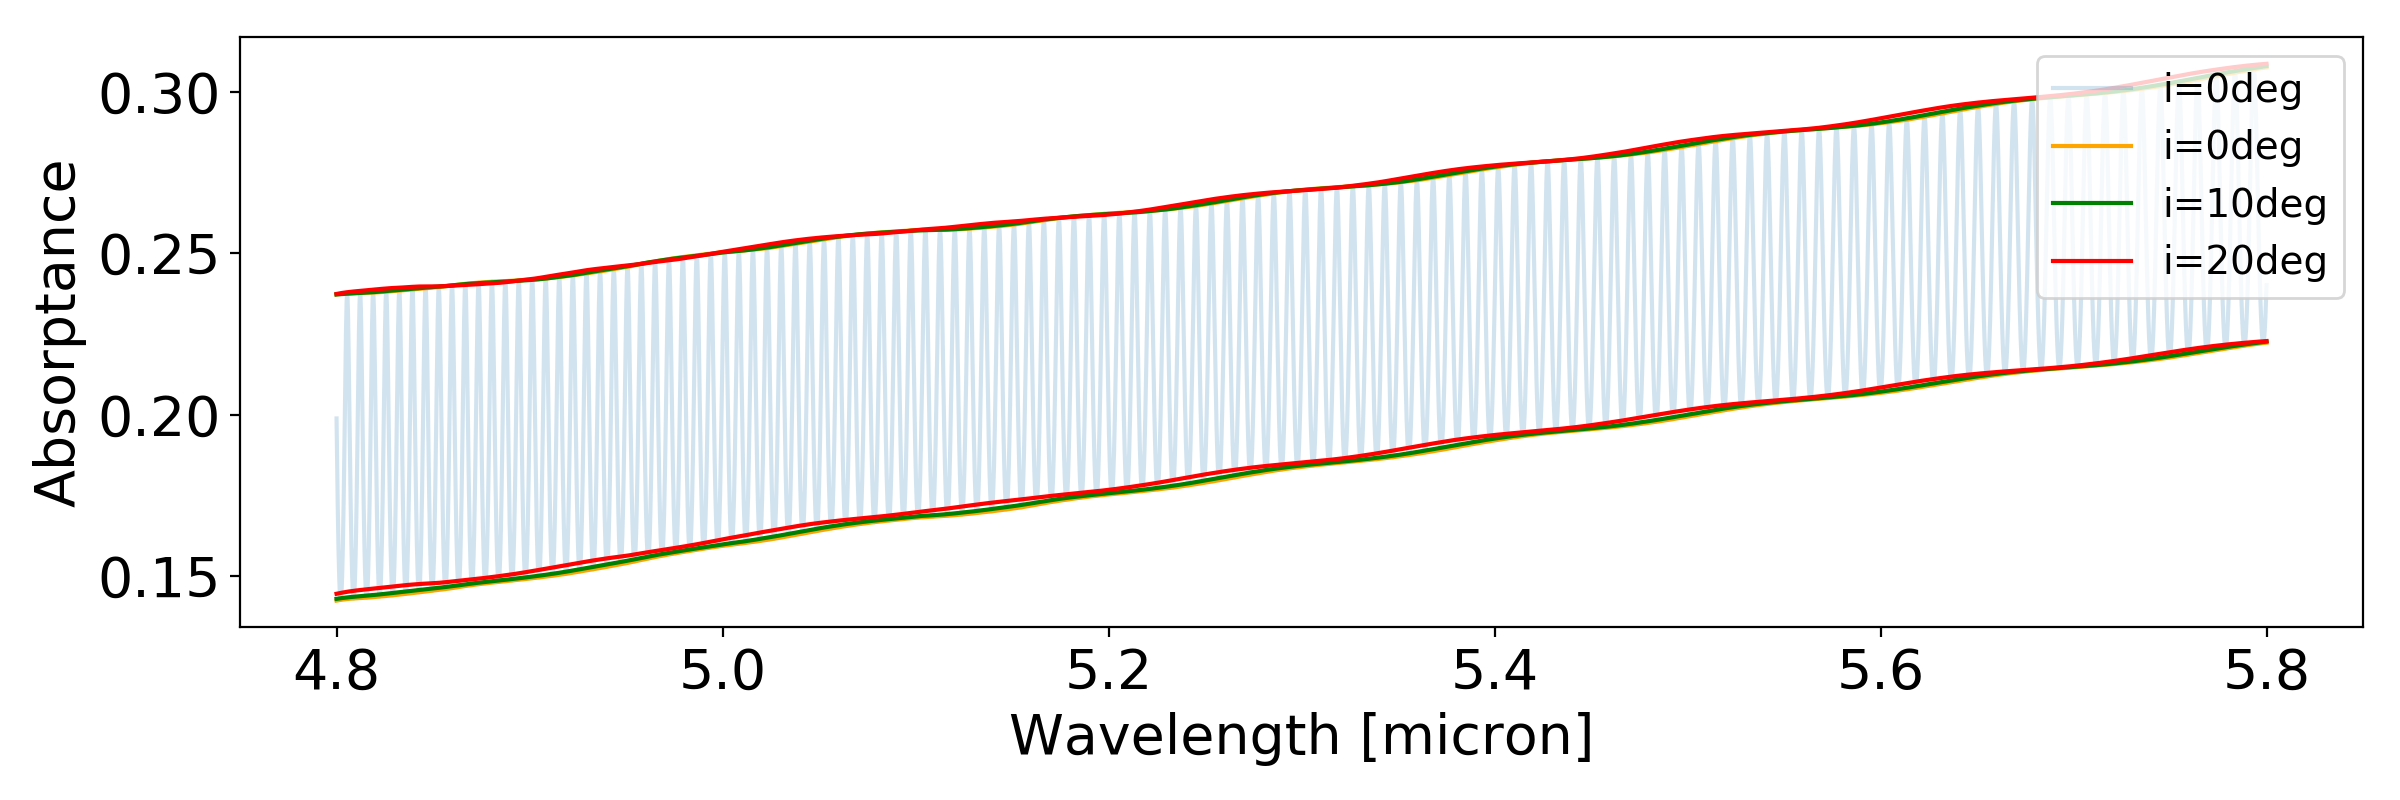

<IPython.core.display.Javascript object>


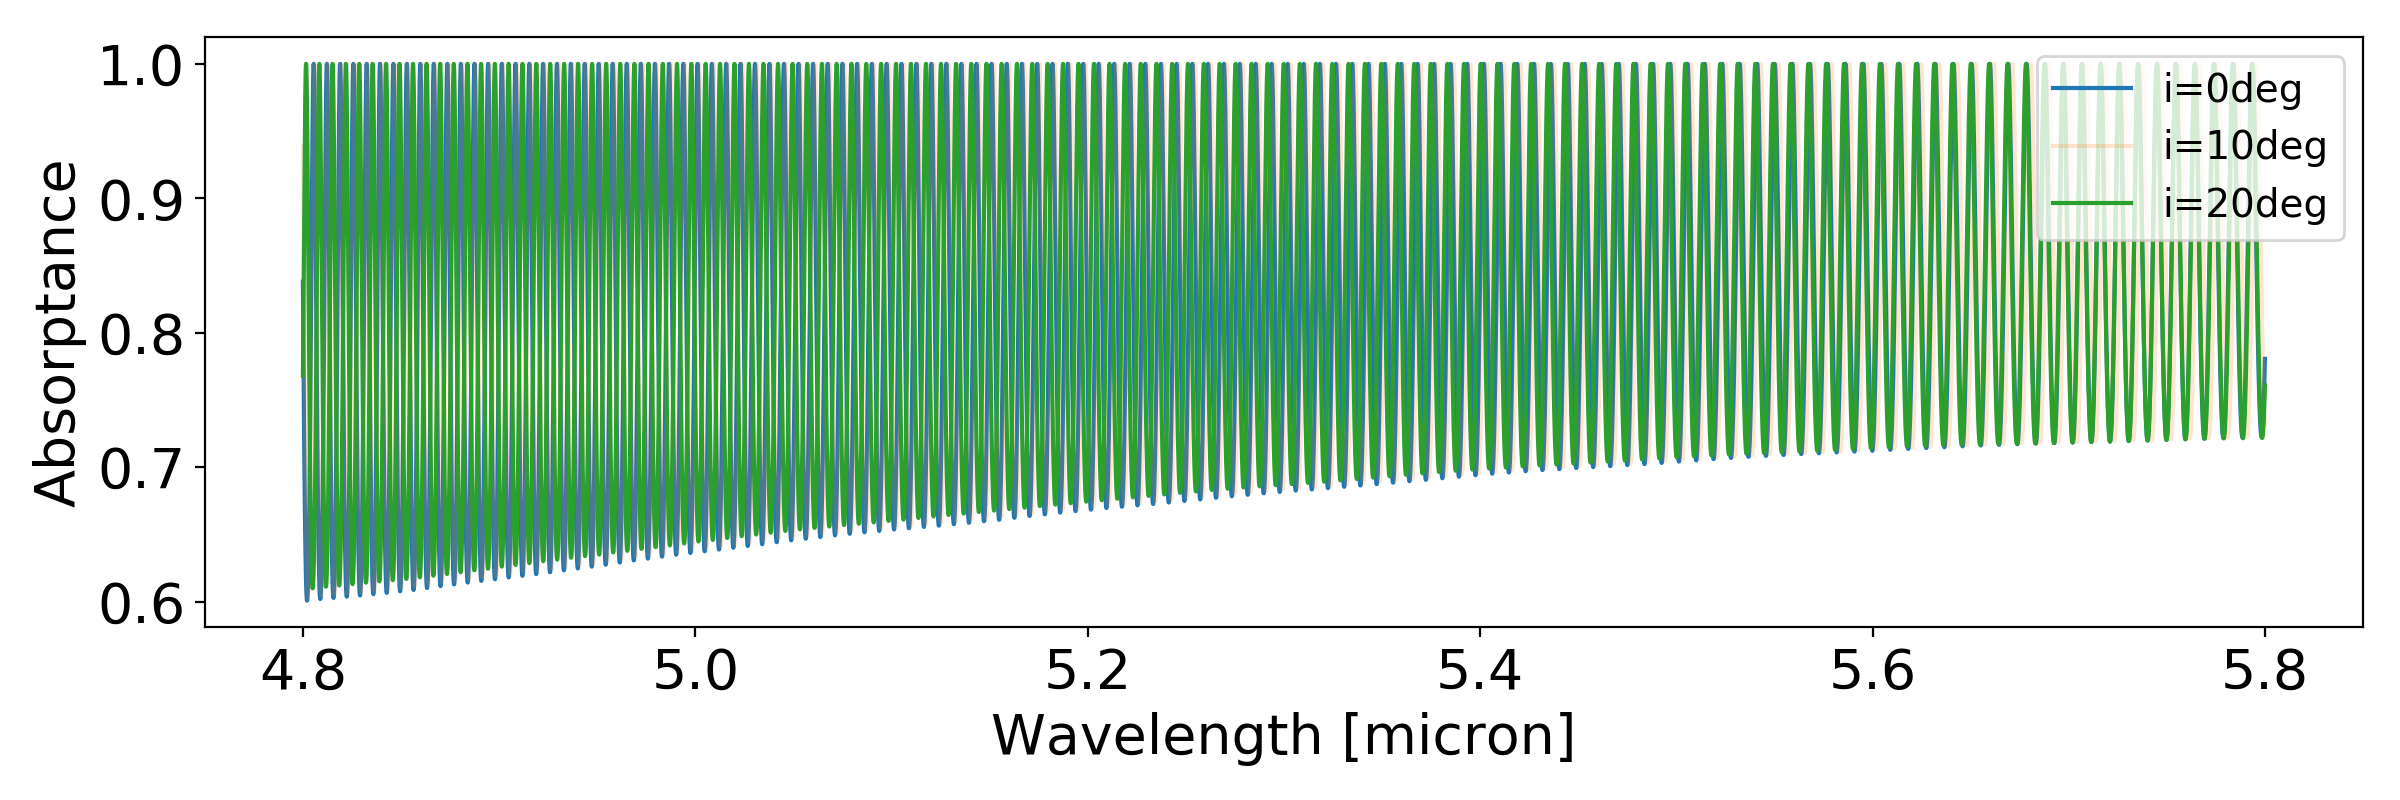

<IPython.core.display.Javascript object>


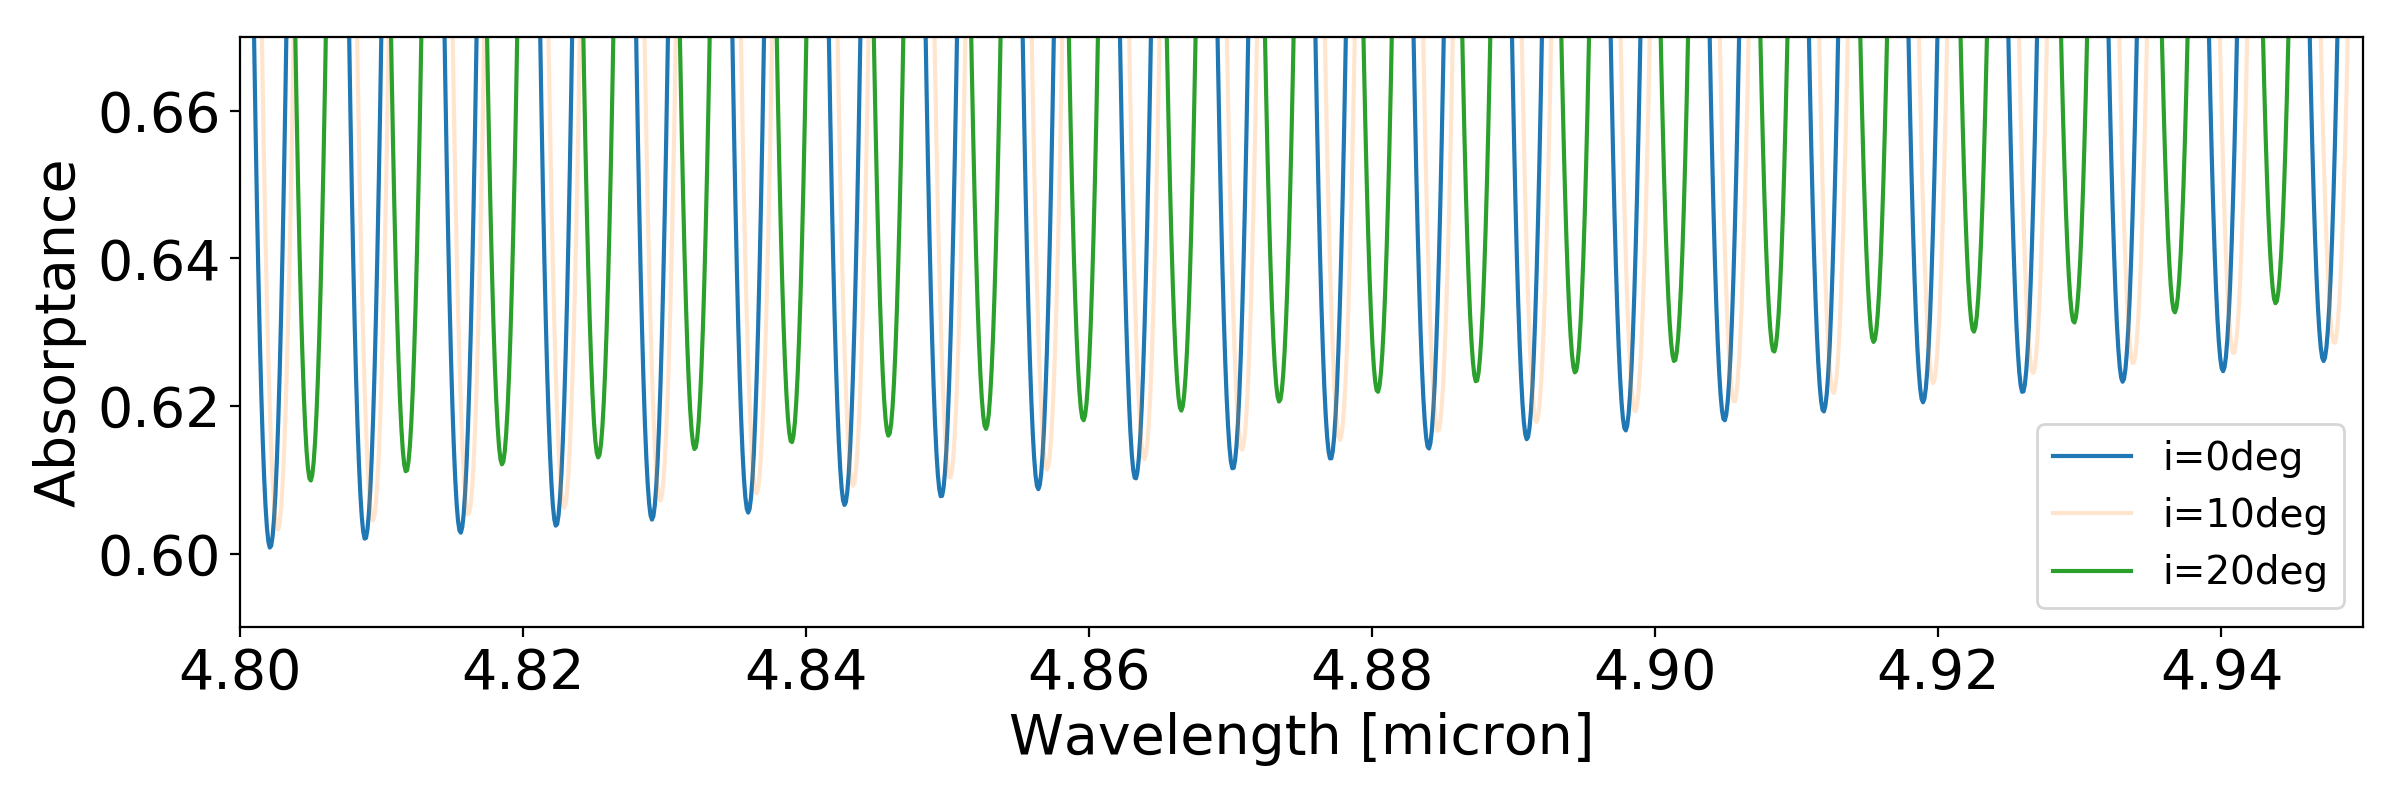

In [8]:
plt.close('all')
Absorp_inc0_norm = funcs.norm_fringe(Absorp_inc0,thres=0,min_dist=50,k=3,ext=0)
Absorp_inc10_norm = funcs.norm_fringe(Absorp_inc10,thres=0,min_dist=50,k=3,ext=0)
Absorp_inc20_norm = funcs.norm_fringe(Absorp_inc20,thres=0,min_dist=50,k=3,ext=0)

Absorp_inc0_norm_baseline = funcs.norm_fringe(-Absorp_inc0,thres=0,min_dist=50,k=3,ext=0)
Absorp_inc10_norm_baseline = funcs.norm_fringe(-Absorp_inc10,thres=0,min_dist=50,k=3,ext=0)
Absorp_inc20_norm_baseline = funcs.norm_fringe(-Absorp_inc20,thres=0,min_dist=50,k=3,ext=0)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0],label='i=0deg')
plt.plot(wav[band],Absorp_inc0_norm[2])
plt.plot(wav[band][Absorp_inc0_norm[1]],Absorp_inc0_norm[0][Absorp_inc0_norm[1]],'ro')
plt.plot(wav[band][Absorp_inc0_norm_baseline[1]],-Absorp_inc0_norm_baseline[0][Absorp_inc0_norm_baseline[1]],'ro')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0],alpha=0.2,label='i=0deg')
plt.plot(wav[band],Absorp_inc0_norm[2],'orange',label='i=0deg')
plt.plot(wav[band],Absorp_inc10_norm[2],'green',label='i=10deg')
plt.plot(wav[band],Absorp_inc20_norm[2],'r',label='i=20deg')

plt.plot(wav[band],-Absorp_inc0_norm_baseline[2],'orange')
plt.plot(wav[band],-Absorp_inc10_norm_baseline[2],'green')
plt.plot(wav[band],-Absorp_inc20_norm_baseline[2],'r')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0]/Absorp_inc0_norm[2],label='i=0deg')
plt.plot(wav[band],Absorp_inc10_norm[0]/Absorp_inc10_norm[2],label='i=10deg',alpha=0.2)
plt.plot(wav[band],Absorp_inc20_norm[0]/Absorp_inc20_norm[2],label='i=20deg')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_inc0_norm[0]/Absorp_inc0_norm[2],label='i=0deg')
plt.plot(wav[band],Absorp_inc10_norm[0]/Absorp_inc10_norm[2],label='i=10deg',alpha=0.2)
plt.plot(wav[band],Absorp_inc20_norm[0]/Absorp_inc20_norm[2],label='i=20deg')
plt.xlim(4.8,4.95)
plt.ylim(0.59,0.67)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='lower right')
plt.tight_layout()

### Remarks:
* We notice a higher absorptance for higher incidence angles. This fact is more pronounced (only(?) seen) on the bottom/baseline of the fringes. On the top of the fringes we mainly see the effect of a shift in frequency of the active layer low-frequency contribution.

<IPython.core.display.Javascript object>


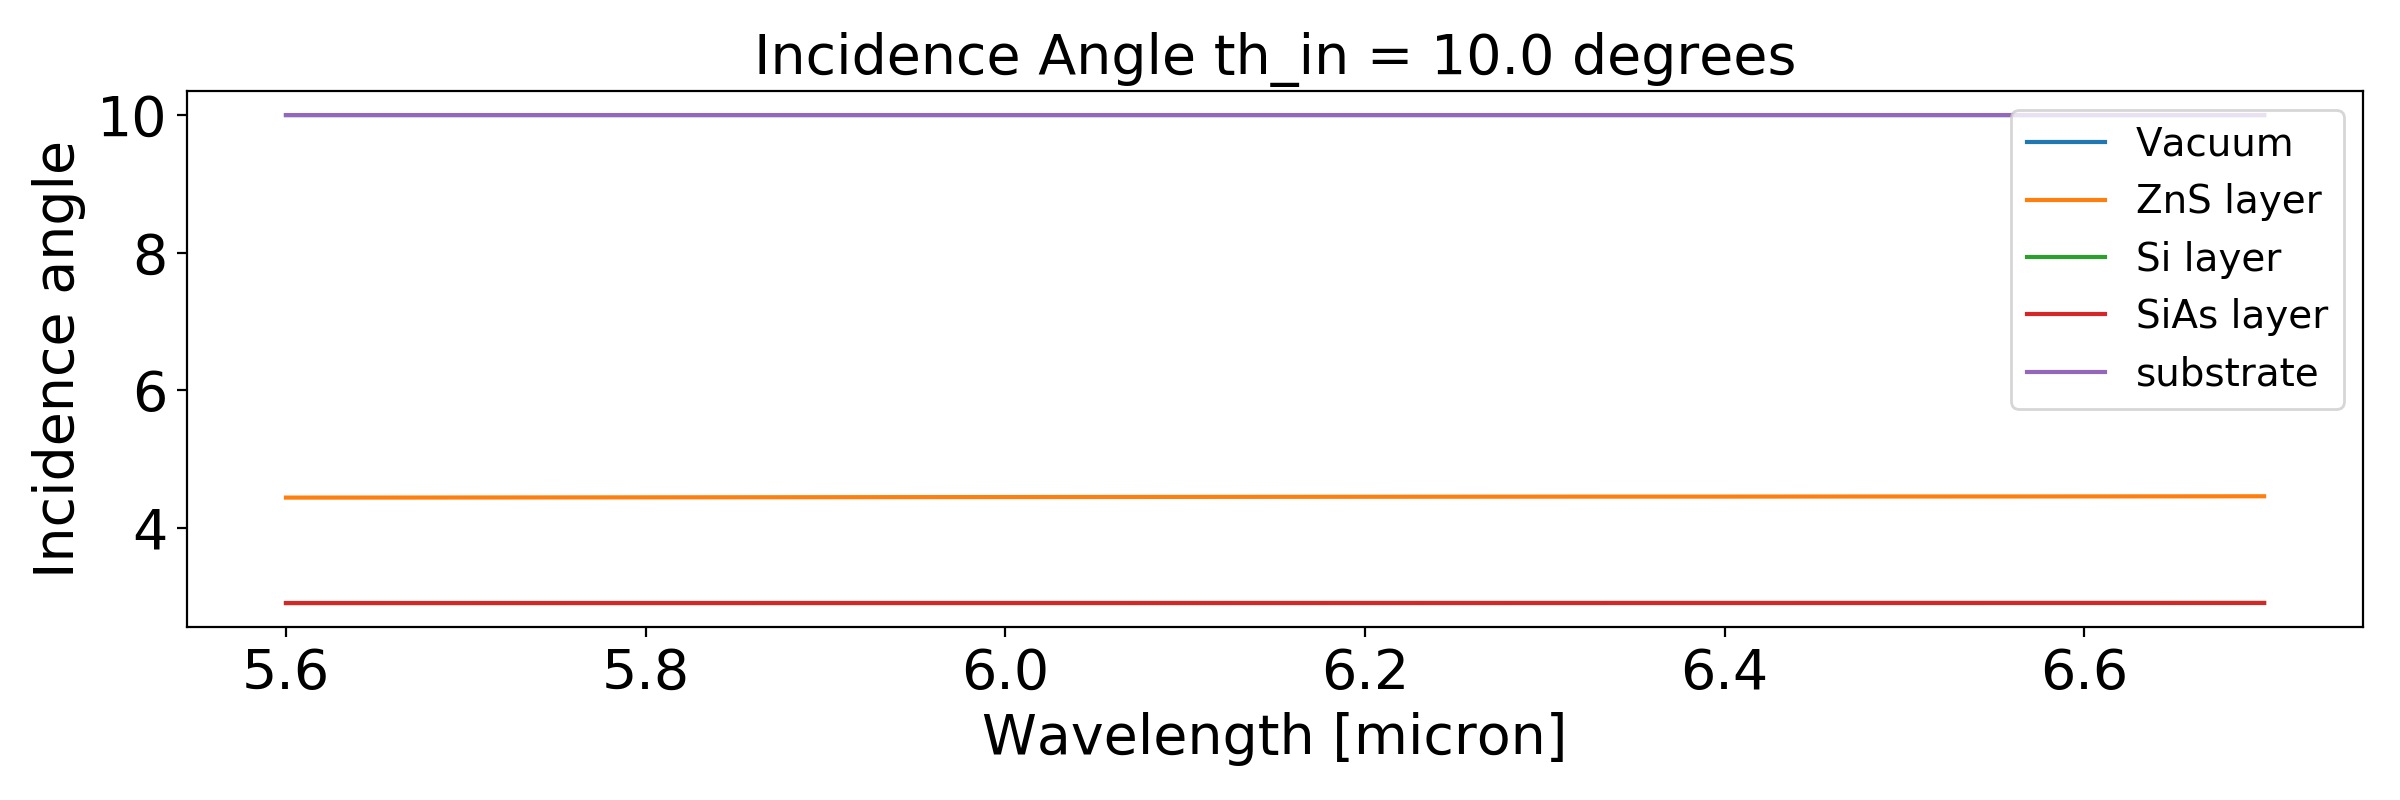

In [9]:
th_in,th_list_ZnS,th_list_Si,th_list_SiAs,th_out = [np.zeros(len(wav[band])) for i in range(5)]

th_0 = 10*deg
for i in range(len(wav[band])):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    th_in[i],th_list_ZnS[i],th_list_Si[i],th_list_SiAs[i],th_out[i]= funcs.snells_law(n_list,th_0)
    
plt.figure(figsize=(12,4))
plt.title('Incidence Angle th_in = {} degrees'.format(round(th_0/deg,2)))
plt.plot(wav[band],th_in/deg,label='Vacuum')
plt.plot(wav[band],th_list_ZnS/deg,label='ZnS layer')
plt.plot(wav[band],th_list_Si/deg,label='Si layer')
plt.plot(wav[band],th_list_SiAs/deg,label='SiAs layer')
plt.plot(wav[band],th_out/deg,label='substrate')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Incidence angle [deg]')
plt.legend(loc='upper right')
plt.tight_layout()

### Remarks:
* Given a most extreme case for a deviation / incidence angle of 10 degrees on the refractive stack, the incidence angle at the Si:As layer reduces to 3 degrees. This suggests that the change in absorptance caused by the incidence angle should be very small.